# Adversarial Attacks

In [142]:
import tensorflow as tf
from keras.models import load_model

from data.file import model_convolutional_dataset
from data.load import load_train_dataset, load_test_dataset

In [143]:
model = load_model(model_convolutional_dataset)

In [144]:
batch_size = 20
x_train, y_train = load_train_dataset()
x_test, y_test = load_test_dataset()

train_input = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_input = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [145]:
from reporting.images import display_dataframe
from keras.backend import argmax
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
import numpy as np

# epsilon: input variation parameter
eps = 20.3
count = 3
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

real = []
attacks = []
for x, y in train_input.take(count):
    x_fgm = fast_gradient_method(model, x, eps, np.inf)
    y_pred_fgm = model.predict(x_fgm)
    print("| real:", y.numpy(), " | prediction (pgd): ", argmax(y_pred_fgm).numpy(), " | accuracy:", test_acc_fgsm(y, y_pred_fgm).numpy().round(decimals=3), " |")

    real.extend(x.numpy())
    attacks.extend(x_fgm.numpy())

| real: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]  | prediction (pgd):  [5 0 4 8 8 8 8 2 2 4 3 5 3 6 8 7 8 8 6 3]  | accuracy: 0.55  |
| real: [4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]  | prediction (pgd):  [4 0 4 1 3 2 4 3 2 9 8 8 6 5 8 5 6 0 2 8]  | accuracy: 0.575  |
| real: [1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1]  | prediction (pgd):  [8 8 7 3 3 8 8 5 9 3 3 0 7 8 4 8 0 7 4 1]  | accuracy: 0.617  |


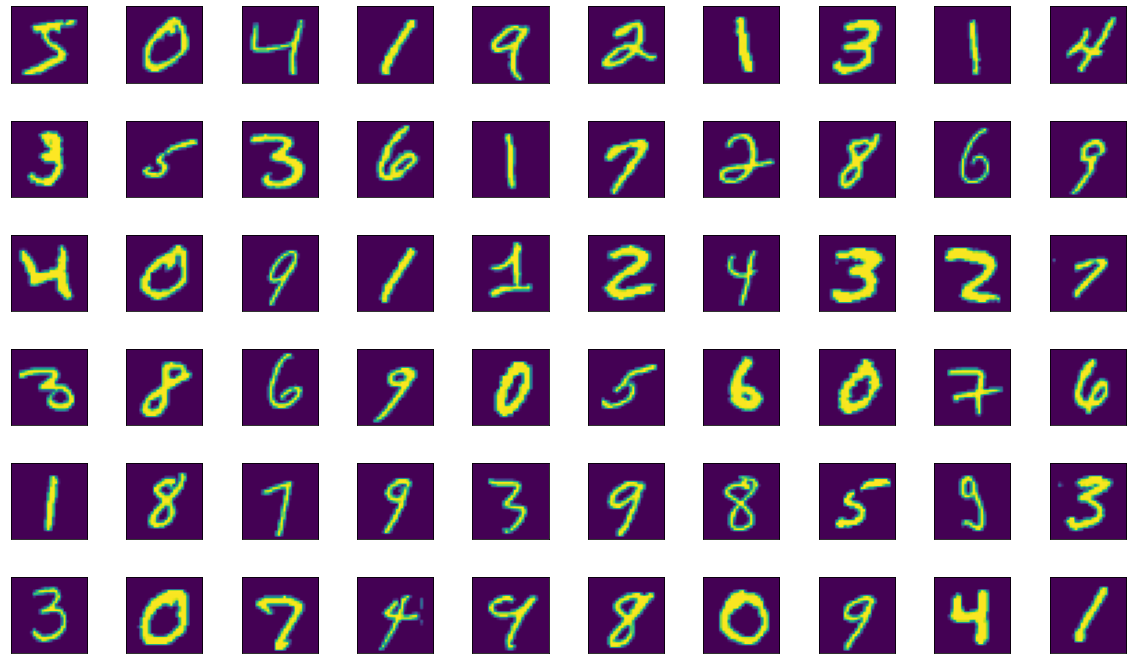

In [146]:
display_dataframe(real, cols=10)

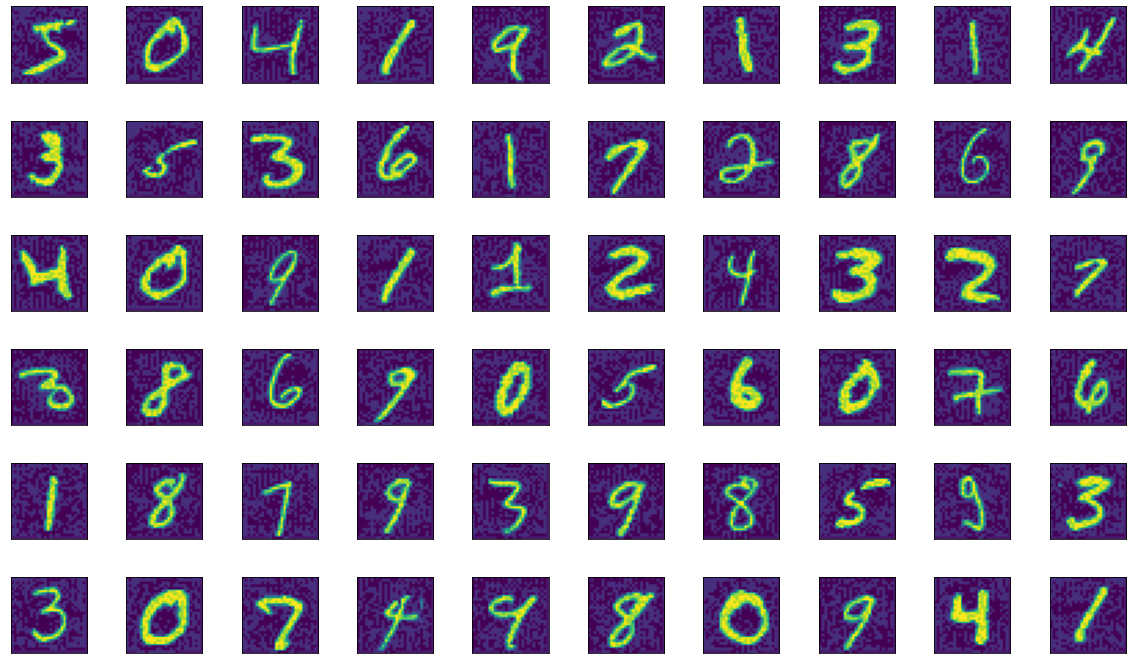

In [147]:
display_dataframe(attacks, cols=10)